In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from requests.auth import HTTPBasicAuth
from pandas.io.json import json_normalize
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import ElasticNet
from statsmodels.tsa.arima_model import ARMA

In [2]:
df = []
l=[
    'https://data.ny.gov/resource/6ivk-p4gh.json',
    'https://data.ny.gov/resource/23v4-2ycs.json',
    'https://data.ny.gov/resource/r4tg-z3mz.json',
    'https://data.ny.gov/resource/ku8b-uzf5.json',
]

for i in l:
    req = requests.get(i+'?$limit=1000000',verify=False).json()
    f=json_normalize(req)
    df.append(f)

C:\Users\JGattuso\AppData\Local\Continuum\anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\JGattuso\AppData\Local\Continuum\anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\JGattuso\AppData\Local\Continuum\anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\JGattuso\AppData\Local

In [3]:
full=pd.concat(df)
full.head()

,date,entrance,exit,beginning_time,vehicle_class,vehicle_count,payment_type
0,2015-12-31T00:00:00.000,15,17,00,4H,7,E-ZPass
1,2015-12-31T00:00:00.000,15,17,00,7H,3,E-ZPass
2,2015-12-31T00:00:00.000,15,17,00,2L,39,CASH
3,2015-12-31T00:00:00.000,15,17,00,5H,3,CASH
4,2015-12-31T00:00:00.000,15,17,00,6H,1,E-ZPass


In [4]:
list(set(full.exit))

['19',
 '34A',
 '39',
 '22',
 '42',
 '34',
 '41',
 '15',
 '24',
 '33',
 '29A',
 '20',
 '46',
 '21',
 '44',
 '17',
 'B3',
 '26',
 'B1',
 '49',
 '43',
 '55',
 '56',
 '40',
 '50',
 '38',
 '25A',
 '30',
 '45',
 '27',
 '35',
 '18',
 '48A',
 '21B',
 '25',
 '36',
 '47',
 '28',
 '23',
 '32',
 '31',
 '29',
 '16H',
 '61',
 'B2',
 '37',
 '48']

In [5]:
full = full[full.exit.isin(["23", "24", "18", "25", "25A","15","19","17"])]

In [6]:
full

,date,entrance,exit,beginning_time,vehicle_class,vehicle_count,payment_type
0,2015-12-31T00:00:00.000,15,17,00,4H,7,E-ZPass
1,2015-12-31T00:00:00.000,15,17,00,7H,3,E-ZPass
2,2015-12-31T00:00:00.000,15,17,00,2L,39,CASH
3,2015-12-31T00:00:00.000,15,17,00,5H,3,CASH
4,2015-12-31T00:00:00.000,15,17,00,6H,1,E-ZPass
...,...,...,...,...,...,...,...
999995,2018-07-18T00:00:00.000,17,19,06,4H,4,E-ZPass
999996,2018-07-18T00:00:00.000,17,19,06,5H,1,E-ZPass
999997,2018-07-18T00:00:00.000,17,19,07,2L,17,CASH
999998,2018-07-18T00:00:00.000,17,19,07,2L,112,E-ZPass


In [7]:
full.vehicle_count = full.vehicle_count.astype(int)
gg=full.groupby(['date']).sum()

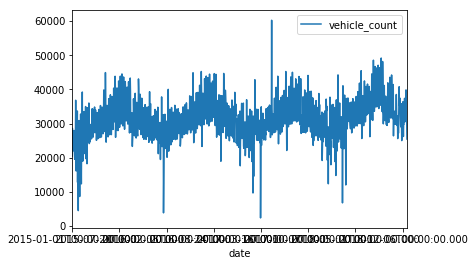

In [8]:
gg.plot()

In [9]:
weather = pd.read_csv("weather_data.csv")
weather = weather[weather.NAME == 'ALBANY INTERNATIONAL AIRPORT, NY US']
weather.DATE=weather.DATE.apply(lambda x:pd.to_datetime(x))
weather

,STATION,NAME,DATE,AWND,DAPR,MDPR,PGTM,PRCP,SNOW,SNWD,...,WSF2,WSF5,WT01,WT02,WT03,WT04,WT05,WT06,WT08,WT09
7994,USW00014735,"ALBANY INTERNATIONAL AIRPORT, NY US",2015-01-01,8.72,NaN,NaN,NaN,0.00,0.0,0.0,...,19.9,25.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7995,USW00014735,"ALBANY INTERNATIONAL AIRPORT, NY US",2015-01-02,9.62,NaN,NaN,NaN,0.00,0.0,0.0,...,23.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7996,USW00014735,"ALBANY INTERNATIONAL AIRPORT, NY US",2015-01-03,4.25,NaN,NaN,NaN,0.57,1.6,0.0,...,15.0,21.0,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN
7997,USW00014735,"ALBANY INTERNATIONAL AIRPORT, NY US",2015-01-04,10.07,NaN,NaN,NaN,0.22,0.0,1.2,...,23.9,33.1,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN
7998,USW00014735,"ALBANY INTERNATIONAL AIRPORT, NY US",2015-01-05,16.78,NaN,NaN,NaN,0.00,0.0,0.0,...,32.0,42.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9450,USW00014735,"ALBANY INTERNATIONAL AIRPORT, NY US",2018-12-27,6.04,NaN,NaN,NaN,0.00,0.0,0.0,...,18.1,25.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9451,USW00014735,"ALBANY INTERNATIONAL AIRPORT, NY US",2018-12-28,12.75,NaN,NaN,NaN,0.09,0.0,0.0,...,23.9,36.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
9452,USW00014735,"ALBANY INTERNATIONAL AIRPORT, NY US",2018-12-29,14.09,NaN,NaN,NaN,0.00,0.0,0.0,...,25.1,34.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
9453,USW00014735,"ALBANY INTERNATIONAL AIRPORT, NY US",2018-12-30,4.70,NaN,NaN,NaN,0.01,0.1,0.0,...,12.1,15.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
pd.DataFrame(weather['DATE']).head()

,DATE
7994,2015-01-01
7995,2015-01-02
7996,2015-01-03
7997,2015-01-04
7998,2015-01-05


In [11]:
grouped=gg.reset_index()

In [12]:
pd.DataFrame(grouped).head()

,date,vehicle_count
0,2015-01-01T00:00:00.000,20488
1,2015-01-02T00:00:00.000,28615
2,2015-01-03T00:00:00.000,22420
3,2015-01-04T00:00:00.000,22344
4,2015-01-05T00:00:00.000,23939


In [13]:
grouped.date=pd.to_datetime(grouped['date'])
grouped.rename(columns = {'date':'DATE'}, inplace = True)
grouped.head()

,DATE,vehicle_count
0,2015-01-01,20488
1,2015-01-02,28615
2,2015-01-03,22420
3,2015-01-04,22344
4,2015-01-05,23939


In [14]:
merged= grouped.merge(weather, how='inner', on='DATE')
print(merged.columns)
merged.head()
filt= merged[[
    'DATE', 'vehicle_count', 'PRCP', 'SNOW', 
    'SNWD', 'TAVG', 'TMAX', 'TMIN'
]]

Index(['DATE', 'vehicle_count', 'STATION', 'NAME', 'AWND', 'DAPR', 'MDPR',
       'PGTM', 'PRCP', 'SNOW', 'SNWD', 'TAVG', 'TMAX', 'TMIN', 'TOBS', 'WDF2',
       'WDF5', 'WESD', 'WESF', 'WSF2', 'WSF5', 'WT01', 'WT02', 'WT03', 'WT04',
       'WT05', 'WT06', 'WT08', 'WT09'],
      dtype='object')


In [16]:
filt.to_csv('car_and_weather.csv',index=False)

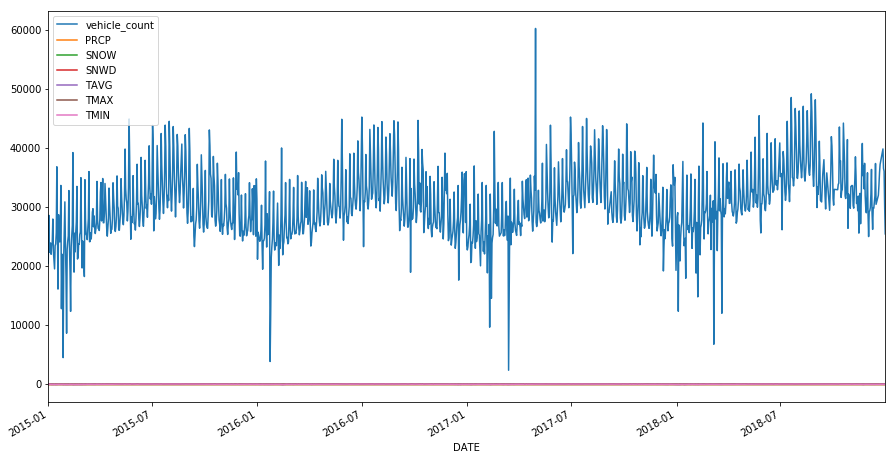

In [15]:
filt[['DATE','vehicle_count', 'PRCP', 'SNOW', 'SNWD', 'TAVG', 'TMAX', 'TMIN']].plot('DATE', figsize=(15,8))

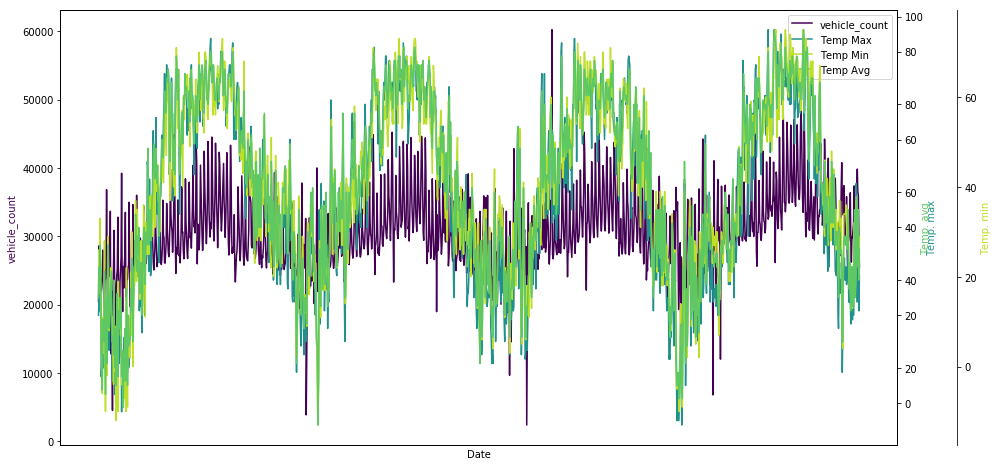

In [36]:
import matplotlib.pyplot as plt 

fig = plt.figure(figsize=(15,8))
host = fig.add_subplot(111)

par1 = host.twinx()
par2 = host.twinx()
par3 = host.twinx()

host.set_xlabel("Date")
host.set_ylabel("vehicle_count")
par1.set_ylabel("Temp. max")
par2.set_ylabel("Temp. min")
par3.set_ylabel("Temp. avg")

color1 = plt.cm.viridis(0)
color2 = plt.cm.viridis(0.5)
color3 = plt.cm.viridis(.9)
color4 = plt.cm.viridis(.75)

p1, = host.plot(filt['vehicle_count'], color=color1,label="vehicle_count")
p2, = par1.plot(filt['TMAX'], color=color2, label="Temp Max")
p3, = par2.plot(filt['TMIN'], color=color3, label="Temp Min")
p4, = par3.plot(filt['TAVG'], color=color4, label="Temp Avg")

lns = [p1, p2, p3, p4]
host.legend(handles=lns, loc='best')

# right, left, top, bottom
par2.spines['right'].set_position(('outward', 60))      
# no x-ticks                 
par2.xaxis.set_ticks([])
# Sometimes handy, same for xaxis
#par2.yaxis.set_ticks_position('right')

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())
par3.yaxis.label.set_color(p4.get_color())

plt.show()

In [37]:
X = filt['vehicle_count'].values.reshape(-1,1)
y = filt['TAVG'].values.reshape(-1,1)

In [38]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [39]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[2.33602982]
[[0.00157649]]


In [41]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df.head()

,Actual,Predicted
0,38.0,42.921186
1,65.0,64.739806
2,72.0,66.343096
3,64.0,62.572132
4,45.0,41.983174


In [42]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 12.714581948653978
Mean Squared Error: 240.23178770419338
Root Mean Squared Error: 15.499412495452638


In [43]:
X = filt[['PRCP', 'SNOW', 'SNWD', 'TAVG', 'TMAX', 'TMIN']].values
y = filt['vehicle_count'].values

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [45]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
y_pred = regressor.predict(X_test)

In [47]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)

In [48]:
df1

,Actual,Predicted
0,25744,28990.661306
1,39584,32697.266136
2,40601,33931.447676
3,38209,31849.153877
4,25149,29834.341209
5,26025,26445.054108
6,44669,31390.603368
7,24802,30663.731295
8,33698,28118.690942
9,29080,33194.342426


In [54]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3796.1169147129167
Mean Squared Error: 23154100.51720817
Root Mean Squared Error: 4811.8707918239215


In [68]:
def difference(dataset):
    diff = list()
    for i in range(1, len(dataset)):
        value = dataset[i] - dataset[i - 1]
        diff.append(value)
    return np.array(diff)

In [69]:
def predict(coef, history):
    yhat = coef[0]
    for i in range(1, len(coef)):
        yhat += coef[i] * history[-i]
    return yhat

In [77]:
X = difference(gg.values)
size = int(len(X) * 0.7)
train, test = X[0:size], X[size:]

In [143]:
# train autoregression
model = AR(train)
model_fit = model.fit(maxlag=21, disp=False)
window = model_fit.k_ar
coef = model_fit.params

In [144]:
# walk forward over time steps in test
history = [train[i] for i in range(len(train))]
predictions = list()
for t in range(len(test)):
    yhat = predict(coef, history)
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)

Test MSE: 15496612.270
0.4213160988424268


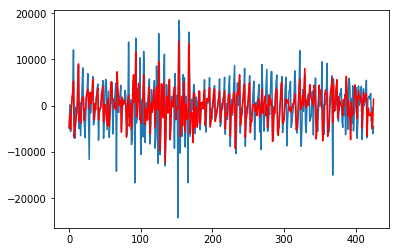

In [145]:
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
print(r2_score(test,predictions))
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [108]:
# fit an AR model and save the whole model to file
from pandas import read_csv
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.ar_model import ARResults
import numpy as np
 
# create a difference transform of the dataset
def difference(dataset):
    diff = list()
    for i in range(1, len(dataset)):
        value = dataset[i] - dataset[i - 1]
        diff.append(value)
    return np.array(diff)
 
# load dataset
X = difference(gg.values)
# fit model
model = AR(X)
model_fit = model.fit(maxlag=6, disp=False)
# save model to file
model_fit.save('ar_model.pkl')
# save the differenced dataset
np.save('ar_data.npy', X)
# save the last ob
np.save('ar_obs.npy', [grouped.values[-1]])

In [109]:
# load the AR model from file
loaded = ARResults.load('ar_model.pkl')
print(loaded.params)
data = np.load('ar_data.npy')
last_ob = np.load('ar_obs.npy')
print(last_ob)

[33.58428977 -0.61257532 -0.68617535 -0.66083301 -0.64885331 -0.59431839
 -0.42241667]
[[Timestamp('2018-12-31 00:00:00') 25464]]


In [14]:
model = ARMA(X, order=(2, 1))
model_fit = model.fit(disp=False)

In [15]:
yhat = model_fit.predict(len(X), len(X))
print(yhat)

[-279.5557402]


In [16]:
print(r2_score(test,predictions))

0.41307075668159776


In [146]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(X)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(X), len(X))
print(yhat)

[3.50768851]
